In [1]:
import pandas as pd
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)

# random_state:- The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test.
# Q.Random state change also impact in your accuracy, so how i know the my actual accuracy. 
# ANS:- Through Cross Validation.


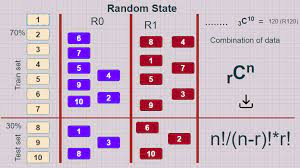

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9333333333333333

# Cross Validation (classification)
# Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/250px-K-fold_cross_validation_EN.svg.png" />

<img src="https://miro.medium.com/max/1838/1*AAwIlHM8TpAVe4l2FihNUQ.png" width=350/>

In [11]:
from sklearn.model_selection import cross_val_score

In [30]:
#10times train_test_split kiya different different angle se aur accuracy predict kiya.
score = cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,cv=10,scoring="accuracy")
print("score: ",score)
print("score_mean: ",score.mean())

score:  [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
score_mean:  0.9666666666666668


In [21]:
for i in range(1,21):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i),X,y,cv=10,scoring="accuracy")
    print(i,score.mean())

1 0.96
2 0.9533333333333334
3 0.9666666666666666
4 0.9666666666666666
5 0.9666666666666668
6 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
9 0.9733333333333334
10 0.9666666666666668
11 0.9666666666666668
12 0.9733333333333334
13 0.9800000000000001
14 0.9733333333333334
15 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
18 0.9800000000000001
19 0.9733333333333334
20 0.9800000000000001


# Cross Validation(Regression)

In [120]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [103]:
df = load_boston()

In [104]:
X = df.data
y = df.target
X.shape , y.shape

((506, 13), (506,))

In [105]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
score = cross_val_score(LinearRegression(),X,y,cv=10,scoring="r2")
print(score)

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


In [108]:
print(score.mean())

0.20252899006056552


In [124]:
score = cross_val_score(KNeighborsRegressor(n_neighbors=5),X,y,cv=10,scoring="r2")
print(score)

[ -1.35022939  -1.19747005 -42.60477861  -0.68413902  -0.37483567
  -0.65502462  -1.59380978   0.06494501  -0.70831901  -0.38894401]


In [125]:
print(score.mean())

-4.949260514859802


In [126]:
# So we try different different Regression Algorithm

In [ ]:
# How many scoring function we have

In [127]:
from sklearn.metrics import SCORERS

In [131]:
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

# ---------------------------------------------------------------------------------

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
df1 = pd.DataFrame(df.data,columns=df.feature_names,dtype=np.int8)

In [112]:
df1["target"]=df.target

In [113]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,18,2,0,0,6,65,4,1,40,15,-116,4,24.0
1,0,0,7,0,0,6,78,4,2,-14,17,-116,9,21.6
2,0,0,7,0,0,7,61,4,2,-14,17,-120,4,34.7
3,0,0,2,0,0,6,45,6,3,-34,18,-118,2,33.4
4,0,0,2,0,0,7,54,6,3,-34,18,-116,5,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,11,0,0,6,69,2,1,17,21,-121,9,22.4
502,0,0,11,0,0,6,76,2,1,17,21,-116,9,20.6
503,0,0,11,0,0,6,91,2,1,17,21,-116,5,23.9
504,0,0,11,0,0,6,89,2,1,17,21,-119,6,22.0


<AxesSubplot:xlabel='DIS', ylabel='RAD'>

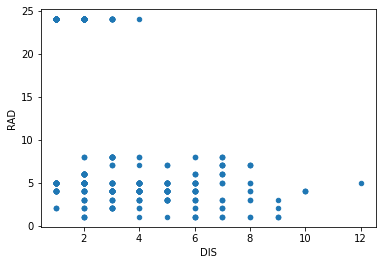

In [118]:
df1.plot.scatter(x="DIS",y="RAD")